In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
data = {
    "message": [
        "Congratulations you won a lottery",
        "Free offer claim now",
        "Win cash prize today",
        "Meeting scheduled at 10 AM",
        "Project discussion tomorrow",
        "Please review the document",
        "Limited offer hurry up",
        "Call me when free",
        "You have won free coupons",
        "Let us meet for lunch"
    ],
    "label": [
        "spam", "spam", "spam",
        "ham", "ham", "ham",
        "spam", "ham", "spam", "ham"
    ]
}

df = pd.DataFrame(data)
df.to_csv("dataset.csv", index=False)

df

,message,label
0,Congratulations you won a lottery,spam
1,Free offer claim now,spam
2,Win cash prize today,spam
3,Meeting scheduled at 10 AM,ham
4,Project discussion tomorrow,ham
5,Please review the document,ham
6,Limited offer hurry up,spam
7,Call me when free,ham
8,You have won free coupons,spam
9,Let us meet for lunch,ham


In [ ]:
print("Dataset Shape:", df.shape)
print("\nLabel Count:\n", df['label'].value_counts())

Dataset Shape: (10, 2)

Label Count:
 label
spam    5
ham     5
Name: count, dtype: int64


In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)
df

,message,label,clean_message
0,Congratulations you won a lottery,spam,congratulations you won a lottery
1,Free offer claim now,spam,free offer claim now
2,Win cash prize today,spam,win cash prize today
3,Meeting scheduled at 10 AM,ham,meeting scheduled at 10 am
4,Project discussion tomorrow,ham,project discussion tomorrow
5,Please review the document,ham,please review the document
6,Limited offer hurry up,spam,limited offer hurry up
7,Call me when free,ham,call me when free
8,You have won free coupons,spam,you have won free coupons
9,Let us meet for lunch,ham,let us meet for lunch


In [ ]:
df['label_num'] = df['label'].map({'spam':1, 'ham':0})

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_num']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.0


In [ ]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[0 0]
 [2 0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

In [ ]:
test_emails = [
    "You won free cash now",
    "Team meeting at 3 PM",
    "Claim your prize today",
    "Please send the assignment"
]

clean_test = [clean_text(msg) for msg in test_emails]
test_vector = vectorizer.transform(clean_test)

results = model.predict(test_vector)

for msg, res in zip(test_emails, results):
    print(msg, "➡️", "Spam" if res==1 else "Not Spam")

You won free cash now ➡️ Spam
Team meeting at 3 PM ➡️ Not Spam
Claim your prize today ➡️ Spam
Please send the assignment ➡️ Not Spam


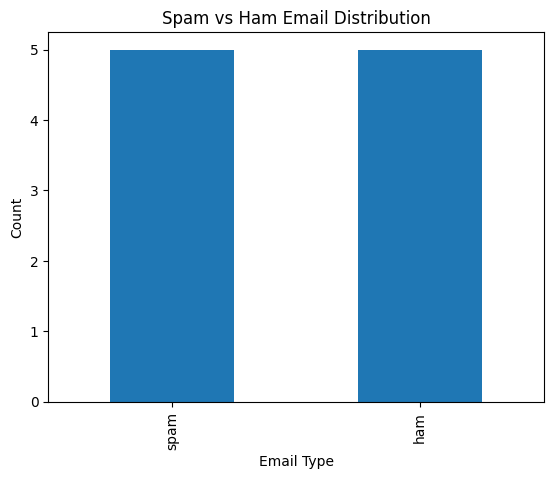

In [ ]:
import matplotlib.pyplot as plt

df['label'].value_counts().plot(kind='bar')
plt.title("Spam vs Ham Email Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.show()

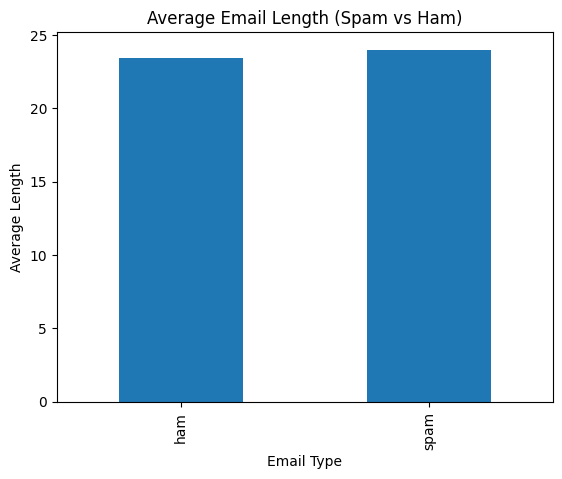

In [ ]:
df['email_length'] = df['clean_message'].apply(len)

df.groupby('label')['email_length'].mean().plot(kind='bar')
plt.title("Average Email Length (Spam vs Ham)")
plt.xlabel("Email Type")
plt.ylabel("Average Length")
plt.show()

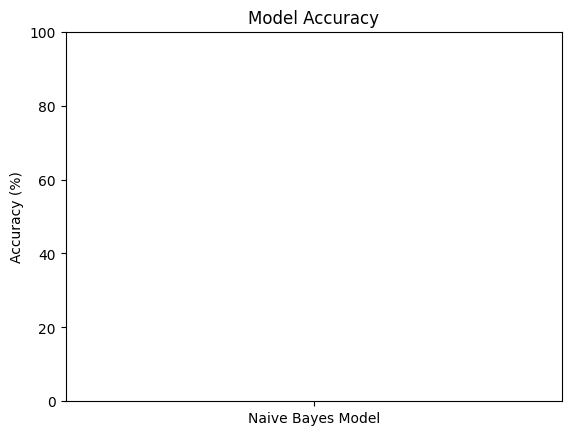

In [ ]:
accuracy_percentage = accuracy * 100

plt.bar(['Naive Bayes Model'], [accuracy_percentage])
plt.title("Model Accuracy")
plt.ylabel("Accuracy (%)")
plt.ylim(0,100)
plt.show()

In [ ]:
import pickle

with open("spam_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully")

Model saved successfully


In [ ]:
with open("spam_model.pkl", "rb") as file:
    loaded_model = pickle.load(file)

sample = ["Exclusive free offer waiting for you"]
sample_clean = [clean_text(sample[0])]
sample_vec = vectorizer.transform(sample_clean)

prediction = loaded_model.predict(sample_vec)
print("Spam" if prediction[0]==1 else "Not Spam")

Not Spam


In [ ]:
!pip install streamlit pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 58.0 MB/s eta 0:00:00


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Title
st.title("Spam Email Detection App")
st.write("AI/ML Project using Streamlit")

# Dataset
data = {
    "message": [
        "Congratulations you won a lottery",
        "Free offer claim now",
        "Meeting scheduled at 10 AM",
        "Project discussion tomorrow",
        "Win cash prize today",
        "Please review the document"
    ],
    "label": ["spam", "spam", "ham", "ham", "spam", "ham"]
}

df = pd.DataFrame(data)

# Clean text function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    return text

df['clean_message'] = df['message'].apply(clean_text)
df['label_num'] = df['label'].map({'spam':1, 'ham':0})

# Vectorization
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_message'])
y = df['label_num']

# Train model
model = MultinomialNB()
model.fit(X, y)

# User input
user_input = st.text_input("Enter an email message:")

if st.button("Check Spam"):
    cleaned = clean_text(user_input)
    vect = vectorizer.transform([cleaned])
    prediction = model.predict(vect)

    if prediction[0] == 1:
        st.error("🚫 This is a SPAM Email")
    else:
        st.success("✅ This is NOT a Spam Email")

Writing app.py


In [ ]:
!ngrok config add-authtoken 38Saaqp5NlruNPVvSdgk0GUn0Z4_nya9Fd4Mod7P2CdY39m8

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

public_url = ngrok.connect(8501)
public_url

<NgrokTunnel: "https://fussbudgety-cecil-tinderlike.ngrok-free.dev" -> "http://localhost:8501">

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!streamlit run app.py &>/content/logs.txt &